In [2]:
import pandas as pd

In [3]:
data = pd.read_pickle("../datasets/processed/high_density_defects/BN/data.pickle.gz")

In [4]:
predictions = pd.read_csv(
    "../datasets/predictions/BN_pilot/band_gap_from_eigenvalue_band_properties/megnet_pytorch-sparse-z-were-200.csv.gz",
    index_col="_id")

In [5]:
target = "band_gap_from_eigenvalue_band_properties"
target_preds = "predicted_band_gap_from_eigenvalue_band_properties_test"

In [6]:
errors = predictions[target_preds] - data[target]

In [7]:
import numpy as np

In [8]:
np.abs(errors).mean()

0.4088529321426392

In [9]:
data["defect_count"] = data.defect_representation.apply(len)

In [10]:
data["abs_error"] = np.abs(errors)

In [15]:
aggregate = data.groupby("defect_count")

In [19]:
aggregate.groups.keys()


dict_keys([3, 6, 9, 12, 16])

In [13]:
import matplotlib.pyplot as plt

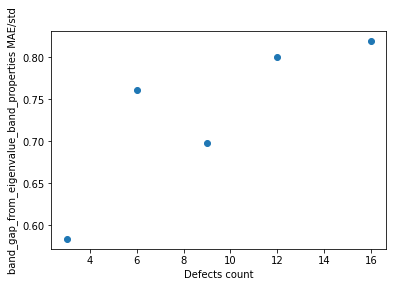

In [27]:
fig, ax = plt.subplots()
ax.scatter(aggregate.groups.keys(), aggregate.abs_error.mean()/aggregate[target].std())
ax.set_xlabel("Defects count")
ax.set_ylabel(f"{target} MAE/std");
fig.savefig("error_from_count.png", dpi=300, bbox_inches='tight')

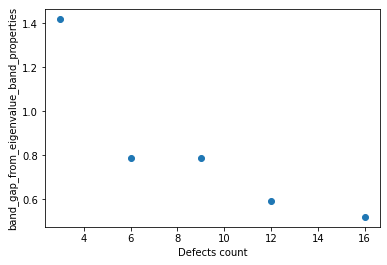

In [26]:
fig, ax = plt.subplots()
ax.scatter(aggregate.groups.keys(), aggregate[target].mean())
ax.set_xlabel("Defects count")
ax.set_ylabel(f"{target}")
fig.savefig("target_from_count.png", dpi=300, bbox_inches='tight')

Text(0, 0.5, 'band_gap_from_eigenvalue_band_properties std')

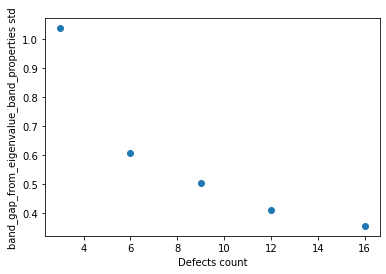

In [28]:
fig, ax = plt.subplots()
ax.scatter(aggregate.groups.keys(), aggregate[target].std())
ax.set_xlabel("Defects count")
ax.set_ylabel(f"{target} std")